**Nithun Selva and Saad Khan**

Spring 2025

CS 444: Deep Learning

#### Project 4: Transformers

In this final notebook, we will train larger GPTs on a large corpus of prose — the entire works of Shakespeare. Once trained, you will be able to prompt your GPTs with some text and it will generate text that appears to follow.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=4)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

2025-05-18 21:43:43.619967: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-18 21:43:43.637835: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-18 21:43:43.637851: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-18 21:43:43.638379: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-18 21:43:43.641638: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf.config.list_physical_devices('GPU')

2025-05-18 16:38:35.489806: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-05-18 16:38:35.508295: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-05-18 16:38:35.508403: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

![Some fun](images/transformer4.png)

## Task 8. Preprocess a large corpus of text

**NOTE:** This is no Task 7. It got removed due to time constraints.

<!-- Let's write code to load in the works of Shakespeare (`shakespeare.txt`) and preprocess it so that we can try a transformer on the text. -->

Run the test code in this section to make sure the works of Shakespeare (`shakespeare.txt`) are loaded and preprocessed properly for the transformer.

In [5]:
from preprocess_corpus import load_document, make_char2ind_map, make_seqs_and_labels

### 8a. Generate corpus and vocabulary

<!-- In `preprocess_corpus.py`, implement the `load_document` function to load in the Shakespeare corpus and make the vocabulary. -->

In [6]:
corpus, vocab = load_document()

print(f'The vocabulary has {len(vocab)} tokens and it should have 65.')
print(f'The vocabulary is (split up over multiple lines):\n{vocab[:25]}\n{vocab[25:50]}\n{vocab[50:]}\n')
print('and it should be:')
print("""['\\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
['M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
['l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']""")

print(f'The corpus has {len(corpus)} chars and it should have 1115394.')
print(55*'-')
print('The first 50 chars of the corpus is:')
print(corpus[:50])
print('and it should be:')
print('''First Citizen:
Before we proceed any further, hear''')
print(55*'-')
print('The last 50 chars of the corpus is:')
print(corpus[-50:])
print('and it should be:')
print('''eep--die, rather; wink'st
Whiles thou art waking.
''')

The vocabulary has 65 tokens and it should have 65.
The vocabulary is (split up over multiple lines):
['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
['M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
['l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

and it should be:
['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
['M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
['l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
The corpus has 1115394 chars and it should have 1115394.
-------------------------------------------------------
The first 50 chars of the corpus is:
First Citizen:
Before we proceed any further, hear
and it should be:
Fi

### 8b. Create char2ind map

<!-- In `preprocess_corpus.py`, implement the `make_char2ind_map` function and test it below. -->

In [7]:
char2ind_map = make_char2ind_map(vocab)

print(f'Size of your char2ind map is {len(char2ind_map)} and it should be 65.')
print('Keys of your char2ind map:')
print(''.join(char2ind_map.keys()))
print("They should be \n\n !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz")
print('Values of your char2ind map:')
print(list(char2ind_map.values()))
print("They should be")
print('[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]')


Size of your char2ind map is 65 and it should be 65.
Keys of your char2ind map:

 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
They should be 

 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
Values of your char2ind map:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
They should be
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]


### 8c. Create sequences of int-coded texts and labels

<!-- In `preprocess_corpus.py`, implement the `make_seqs_and_labels` function, which should extract sequential `seq_len` long chunks (*our desired sequence length for the transformer*) to form the sequences on which we will train the transformer. The labels/targets are just the chars shifted by 1 (i.e. the next char in the corpus). -->

In [8]:
seq_len = 250
seqs, labels = make_seqs_and_labels(corpus, char2ind_map, seq_len=seq_len)

print(f'The shape of your Shakespeare sequences is {seqs.shape} and it should be (4461, 250).')
print(f'The shape of your Shakespeare labels is {labels.shape} and it should be (4461, 250).')
print('The first 15 int-coded tokens of the 1st few sequences are:')
print(seqs[:5, :15].numpy())
print('they should be:')
print('''[[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0]
 [ 0 13 50 50 10  0 35 43  1 49 52 53 61  5 58]
 [ 1 41 47 58 47 64 43 52 57  6  1 58 46 43  1]
 [ 1 58 46 43  1 53 40 48 43 41 58  1 53 44  1]
 [31 43 41 53 52 42  1 15 47 58 47 64 43 52 10]]''')

print('The first 15 int-coded tokens of the last few sequences are:')
print(seqs[-5:, :15].numpy())
print('they should be:')
print('''[[57 53  1 61 43 39 49 50 63  8  1 35 47 50 50]
 [ 6  0 16 53  1 52 53 58  1 53 51 47 58  1 58]
 [58 56 39 52 45 43  1 42 56 53 61 57 47 52 43]
 [42 56 53 54 54  5 42  6  1 39 57  1 40 63  1]
 [13 26 10  0 35 46 39 58  6  1 39 56 58  1 58]]''')

The shape of your Shakespeare sequences is (4461, 250) and it should be (4461, 250).
The shape of your Shakespeare labels is (4461, 250) and it should be (4461, 250).
The first 15 int-coded tokens of the 1st few sequences are:
[[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0]
 [ 0 13 50 50 10  0 35 43  1 49 52 53 61  5 58]
 [ 1 41 47 58 47 64 43 52 57  6  1 58 46 43  1]
 [ 1 58 46 43  1 53 40 48 43 41 58  1 53 44  1]
 [31 43 41 53 52 42  1 15 47 58 47 64 43 52 10]]
they should be:
[[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0]
 [ 0 13 50 50 10  0 35 43  1 49 52 53 61  5 58]
 [ 1 41 47 58 47 64 43 52 57  6  1 58 46 43  1]
 [ 1 58 46 43  1 53 40 48 43 41 58  1 53 44  1]
 [31 43 41 53 52 42  1 15 47 58 47 64 43 52 10]]
The first 15 int-coded tokens of the last few sequences are:
[[57 53  1 61 43 39 49 50 63  8  1 35 47 50 50]
 [ 6  0 16 53  1 52 53 58  1 53 51 47 58  1 58]
 [58 56 39 52 45 43  1 42 56 53 61 57 47 52 43]
 [42 56 53 54 54  5 42  6  1 39 57  1 40 63  1]
 [13 26 10  0 35 46 39

2025-05-18 12:36:51.596470: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-05-18 12:36:51.596589: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-05-18 12:36:51.596640: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

### 8d. Add padding char to dictionary

**TODO:** Add the usual padding char (`'#'`) to the char2ind map to the next available int slot.

In [9]:
# Add padding char to dictionary
char2ind_map['#'] = len(char2ind_map)
padding_char_enc = char2ind_map['#']

## Task 9. Train GPT on Shakespeare

Now we are ready to train a GPT on the works of Shakespeare!

### 9a. Build `GPTMini6`

We will use a deeper transformer called `GPTMini6` for training on the Shakespeare corpus. Build the neural network then check the summary below.

In [10]:
from gpts import GPTMini6

In [11]:
# TODO: Set padding_char_enc to the int coded padding token below

myminigpt = GPTMini6(vocab_sz=9, seq_len=15, padding_char_enc=padding_char_enc)
myminigpt.compile(loss='temporal_cross_entropy')

2025-05-18 12:36:51.930659: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 15, 9]
TransformerBlock_5:
	TransformerBlock_5_mlp:
	Dropout layer output(TransformerBlock_5_mlp_dropout) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_5_mlp_dense2) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_5_mlp_dense1) shape: [1, 15, 1536]
	TransformerBlock_5_mha:
	Dropout layer output(TransformerBlock_5_mha_dropout) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_5_mha_dense_proj) shape: [1, 15, 384]
	TransformerBlock_5_mha_attn:
	Dropout layer output(TransformerBlock_5_mha_attn_dropout) shape: [1, 6, 15, 15]
	TransformerBlock_5_mha_qkv:
	Dense layer output(TransformerBlock_5_mha_qkv_V) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_5_mha_qkv_K) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_5_mha_qkv_Q) shape: [1, 15, 384]
TransformerBlock_4:
	TransformerBlock_4_mlp:
	Dropout layer output(TransformerBlock_4_mlp_dro

The above cell should output:

```
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 15, 9]
TransformerBlock_5:
	TransformerBlock_5/MLP:
	Dropout layer output(TransformerBlock_5/MLP/dropout) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_5/MLP/dense_1) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_5/MLP/dense_0) shape: [1, 15, 1536]
	TransformerBlock_5/multihead_attention:
	Dropout layer output(TransformerBlock_5/multihead_attention/dropout) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_5/multihead_attention/dense_1) shape: [1, 15, 384]
	TransformerBlock_5/multihead_attention/attention:
	Dropout layer output(TransformerBlock_5/multihead_attention/attention/dropout) shape: [1, 6, 15, 15]
	TransformerBlock_5/multihead_attention/qkv_block:
	Dense layer output(TransformerBlock_5/multihead_attention/qkv_block/dense_v) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_5/multihead_attention/qkv_block/dense_k) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_5/multihead_attention/qkv_block/dense_q) shape: [1, 15, 384]
TransformerBlock_4:
	TransformerBlock_4/MLP:
	Dropout layer output(TransformerBlock_4/MLP/dropout) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_4/MLP/dense_1) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_4/MLP/dense_0) shape: [1, 15, 1536]
	TransformerBlock_4/multihead_attention:
	Dropout layer output(TransformerBlock_4/multihead_attention/dropout) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_4/multihead_attention/dense_1) shape: [1, 15, 384]
	TransformerBlock_4/multihead_attention/attention:
	Dropout layer output(TransformerBlock_4/multihead_attention/attention/dropout) shape: [1, 6, 15, 15]
	TransformerBlock_4/multihead_attention/qkv_block:
	Dense layer output(TransformerBlock_4/multihead_attention/qkv_block/dense_v) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_4/multihead_attention/qkv_block/dense_k) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_4/multihead_attention/qkv_block/dense_q) shape: [1, 15, 384]
TransformerBlock_3:
	TransformerBlock_3/MLP:
	Dropout layer output(TransformerBlock_3/MLP/dropout) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_3/MLP/dense_1) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_3/MLP/dense_0) shape: [1, 15, 1536]
	TransformerBlock_3/multihead_attention:
	Dropout layer output(TransformerBlock_3/multihead_attention/dropout) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_3/multihead_attention/dense_1) shape: [1, 15, 384]
	TransformerBlock_3/multihead_attention/attention:
	Dropout layer output(TransformerBlock_3/multihead_attention/attention/dropout) shape: [1, 6, 15, 15]
	TransformerBlock_3/multihead_attention/qkv_block:
	Dense layer output(TransformerBlock_3/multihead_attention/qkv_block/dense_v) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_3/multihead_attention/qkv_block/dense_k) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_3/multihead_attention/qkv_block/dense_q) shape: [1, 15, 384]
TransformerBlock_2:
	TransformerBlock_2/MLP:
	Dropout layer output(TransformerBlock_2/MLP/dropout) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_2/MLP/dense_1) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_2/MLP/dense_0) shape: [1, 15, 1536]
	TransformerBlock_2/multihead_attention:
	Dropout layer output(TransformerBlock_2/multihead_attention/dropout) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_2/multihead_attention/dense_1) shape: [1, 15, 384]
	TransformerBlock_2/multihead_attention/attention:
	Dropout layer output(TransformerBlock_2/multihead_attention/attention/dropout) shape: [1, 6, 15, 15]
	TransformerBlock_2/multihead_attention/qkv_block:
	Dense layer output(TransformerBlock_2/multihead_attention/qkv_block/dense_v) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_2/multihead_attention/qkv_block/dense_k) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_2/multihead_attention/qkv_block/dense_q) shape: [1, 15, 384]
TransformerBlock_1:
	TransformerBlock_1/MLP:
	Dropout layer output(TransformerBlock_1/MLP/dropout) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_1/MLP/dense_1) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_1/MLP/dense_0) shape: [1, 15, 1536]
	TransformerBlock_1/multihead_attention:
	Dropout layer output(TransformerBlock_1/multihead_attention/dropout) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_1/multihead_attention/dense_1) shape: [1, 15, 384]
	TransformerBlock_1/multihead_attention/attention:
	Dropout layer output(TransformerBlock_1/multihead_attention/attention/dropout) shape: [1, 6, 15, 15]
	TransformerBlock_1/multihead_attention/qkv_block:
	Dense layer output(TransformerBlock_1/multihead_attention/qkv_block/dense_v) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_1/multihead_attention/qkv_block/dense_k) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_1/multihead_attention/qkv_block/dense_q) shape: [1, 15, 384]
TransformerBlock_0:
	TransformerBlock_0/MLP:
	Dropout layer output(TransformerBlock_0/MLP/dropout) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_0/MLP/dense_1) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_0/MLP/dense_0) shape: [1, 15, 1536]
	TransformerBlock_0/multihead_attention:
	Dropout layer output(TransformerBlock_0/multihead_attention/dropout) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_0/multihead_attention/dense_1) shape: [1, 15, 384]
	TransformerBlock_0/multihead_attention/attention:
	Dropout layer output(TransformerBlock_0/multihead_attention/attention/dropout) shape: [1, 6, 15, 15]
	TransformerBlock_0/multihead_attention/qkv_block:
	Dense layer output(TransformerBlock_0/multihead_attention/qkv_block/dense_v) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_0/multihead_attention/qkv_block/dense_k) shape: [1, 15, 384]
	Dense layer output(TransformerBlock_0/multihead_attention/qkv_block/dense_q) shape: [1, 15, 384]
PositionalEncodingBlock:
	Dropout layer output(PositionalEncodingBlock/dropout) shape: [1, 15, 384]
	Positional encoding layer output(PositionalEncodingBlock/positional_enc_layer) shape: [1, 15, 384]
Embedding layer output(EmbeddingLayer) shape: [1, 15, 384]
---------------------------------------------------------------------------
```

### 9b. Train `GPTMini6` on the works of Shakespeare

Use default hyperparameters except for the following:
- For the validation set, use the 1st 200 sequences. For the training set, use all sequences beyond the 1st 200.
- Batch size of `64`.
- Patience of `15`.
- Learning rate decay patience of `9`.
- Learning rate should be allowed to decay no more than `3` times.
- Limit training to `100` epochs maximum.

Make a well-labeled plot showing the **training and validation loss** over the course of training.

In [12]:
# Correctly initialize the transformer with proper vocabulary size and sequence length
shakespeare_gpt = GPTMini6(
    vocab_sz=len(char2ind_map), 
    seq_len=seq_len, 
    padding_char_enc=padding_char_enc
)
shakespeare_gpt.compile(loss='temporal_cross_entropy')

---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 250, 66]
TransformerBlock_5:
	TransformerBlock_5_mlp:
	Dropout layer output(TransformerBlock_5_mlp_dropout) shape: [1, 250, 384]
	Dense layer output(TransformerBlock_5_mlp_dense2) shape: [1, 250, 384]
	Dense layer output(TransformerBlock_5_mlp_dense1) shape: [1, 250, 1536]
	TransformerBlock_5_mha:
	Dropout layer output(TransformerBlock_5_mha_dropout) shape: [1, 250, 384]
	Dense layer output(TransformerBlock_5_mha_dense_proj) shape: [1, 250, 384]
	TransformerBlock_5_mha_attn:
	Dropout layer output(TransformerBlock_5_mha_attn_dropout) shape: [1, 6, 250, 250]
	TransformerBlock_5_mha_qkv:
	Dense layer output(TransformerBlock_5_mha_qkv_V) shape: [1, 250, 384]
	Dense layer output(TransformerBlock_5_mha_qkv_K) shape: [1, 250, 384]
	Dense layer output(TransformerBlock_5_mha_qkv_Q) shape: [1, 250, 384]
TransformerBlock_4:
	TransformerBlock_4_mlp:
	Dropout layer output(TransformerBlo

In [13]:
# Split data into training and validation sets as specified
val_size = 200
x_val_shakespeare = seqs[:val_size]
y_val_shakespeare = labels[:val_size]
x_train_shakespeare = seqs[val_size:]
y_train_shakespeare = labels[val_size:]

print(f"Training set size: {len(x_train_shakespeare)}")
print(f"Validation set size: {len(x_val_shakespeare)}")

# Set training hyperparameters
batch_size = 64
patience = 15
lr_patience = 9
lr_max_decays = 3
max_epochs = 100

# Train the model
tf.keras.backend.clear_session()
tf.random.set_seed(0)

print("Starting training GPTMini6 on Shakespeare corpus...")
train_loss_hist, val_loss_hist, val_acc_hist, epochs_trained = shakespeare_gpt.fit(
    x=x_train_shakespeare,
    y=y_train_shakespeare,
    x_val=x_val_shakespeare,
    y_val=y_val_shakespeare,
    batch_size=batch_size,
    max_epochs=max_epochs,
    val_every=1,
    verbose=True,
    patience=patience,
    lr_patience=lr_patience,
    lr_decay_factor=0.5,
    lr_max_decays=lr_max_decays
)

Training set size: 4261
Validation set size: 200
Starting training GPTMini6 on Shakespeare corpus...
Tensor("Reshape_38:0", shape=(64, 250), dtype=float32)
Tensor("Reshape_38:0", shape=(64, 250), dtype=float32)


2025-05-18 12:36:56.084932: I external/local_xla/xla/service/service.cc:168] XLA service 0x4138f5f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-05-18 12:36:56.084955: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2025-05-18 12:36:56.239277: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-18 12:36:56.499381: W tensorflow/compiler/tf2xla/kernels/random_ops.cc:59] Warning: Using tf.random.uniform with XLA compilation will ignore seeds; consider using tf.random.stateless_uniform instead if reproducible behavior is desired. cond/dropout/random_uniform/RandomUniform
2025-05-18 12:36:57.149165: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2025-05-18 12:37:01.725006: I external/local_xla/xla/stream_executor/g

Tensor("Reshape_38:0", shape=(37, 250), dtype=float32)


W0000 00:00:1747586237.780556    2934 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1747586237.783043    2934 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1747586237.785483    2934 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1747586237.787943    2934 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1747586237.790380    2934 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1747586237.792896    2934 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Tensor("Reshape_38:0", shape=(64, 250), dtype=float32)
Epoch 1/100 - Train Loss: 3.5115, Val Loss: 3.2949, Val Acc: 0.1485
Epoch 1 completed in 26.58 seconds.
Epoch 2/100 - Train Loss: 3.3233, Val Loss: 3.2910, Val Acc: 0.1485
Epoch 2 completed in 7.70 seconds.
Epoch 3/100 - Train Loss: 3.2413, Val Loss: 3.0545, Val Acc: 0.1819
Epoch 3 completed in 7.68 seconds.
Epoch 4/100 - Train Loss: 2.8487, Val Loss: 2.6373, Val Acc: 0.2617
Epoch 4 completed in 7.71 seconds.
Epoch 5/100 - Train Loss: 2.6086, Val Loss: 2.5560, Val Acc: 0.2683
Epoch 5 completed in 7.71 seconds.
Epoch 6/100 - Train Loss: 2.5368, Val Loss: 2.5032, Val Acc: 0.2767
Epoch 6 completed in 7.71 seconds.
Epoch 7/100 - Train Loss: 2.4869, Val Loss: 2.4692, Val Acc: 0.2791
Epoch 7 completed in 7.71 seconds.
Epoch 8/100 - Train Loss: 2.4334, Val Loss: 2.4201, Val Acc: 0.2897
Epoch 8 completed in 7.71 seconds.
Epoch 9/100 - Train Loss: 2.3740, Val Loss: 2.3057, Val Acc: 0.3244
Epoch 9 completed in 7.71 seconds.
Epoch 10/100 - Tr

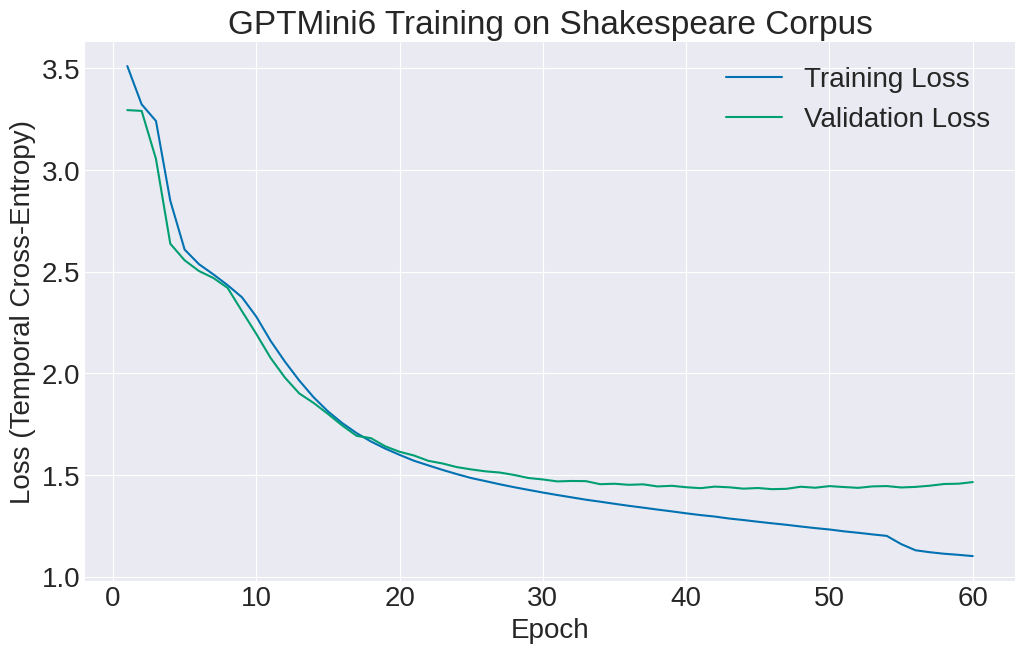


Training finished after 60 epochs.
Final validation loss: 1.4647


In [14]:
# Plot training results
plt.figure(figsize=(12, 7))
plt.plot(np.arange(1, len(train_loss_hist) + 1), train_loss_hist, label='Training Loss')
val_epochs = np.arange(1, len(val_loss_hist) + 1)
plt.plot(val_epochs, val_loss_hist, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Temporal Cross-Entropy)')
plt.title('GPTMini6 Training on Shakespeare Corpus')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nTraining finished after {epochs_trained} epochs.")
print(f"Final validation loss: {val_loss_hist[-1]:.4f}")

### 9c. Prompt GPT to generate Shakespearian text  

Have your GPT to generate a large amount of text (e.g. generate 5000 chars) that follows a prompt of your choice (a string containing few words or a sentence).

**Guidelines**
1. Use your `make_ind2char_mapping` from the math datasets to make the reverse map.
2. Use the `'distributed'` method for generating text.

When you turn in your project, include an example of at least one long passage of generated text by your GPT below.

In [15]:
from addition_dataset import make_ind2char_mapping

In [16]:
# Create the reverse mapping
ind2char_map = make_ind2char_mapping(char2ind_map)

prompt = "To be, or not to be"

gen_text = shakespeare_gpt.generate_sequence(
    prompt=prompt,
    length=5000,
    char2ind_map=char2ind_map,
    ind2char_map=ind2char_map,
    method='distributed', 
    live_print=True
)

print('***final output***')
print(''.join(gen_text))

To be, or not to be done, nor art ne'er five;
Or therefore, whom I need to her fair rocks,
Give me thy noble tongue use a dearer's breath
To strew murder sound? But he that strength
Their chambers doth of my poor against yoke.
My father, I hear the mayor falsehood flay!

PAGE:
Good they know it in the sweet duke made
Now in my son, 'Dead by nature, would be rough,
I'll seem to be satisful in their eyes.

GLOUCESTER:
My lord,
I speak to repretual carrion: if they were
I would not say not and I.

GLOUCESTER:
What, is my thought, canst thou dost please her?

GLOUCESTER:
To dear awhile?
Gentle Lord Hastings and the word with contrary
The mannest of such a day's endrance brother,
His care from hence to some favour, bock,
And faults back against the names of no court,
So doth ask on their master, whose soter
To blood put in law or twrangling crown,
Were being and hand him and blind so slew
Should be so before the freshest bones.

DION:
The king's day should in faithful married
By KAPHARNA:
A

### 9d. Questions

**Question 9:** Rerun your generation using the `'max'` method. Which method generates better sounding/more interesting text? **Why?**

In [17]:
max_prompt = "To be, or not to be"

max_gen_text = shakespeare_gpt.generate_sequence(
    prompt=max_prompt,
    length=5000,
    char2ind_map=char2ind_map,
    ind2char_map=ind2char_map,
    method='max',  
    live_print=True
)

print('*** Text Generated with "max" Method ***')
print(''.join(max_gen_text))

To be, or not to be so bring and so far
As thou art a man of man of my soul to me.

GLOUCESTER:
I would they were at the common with the world.

KING EDWARD IV:
And thou shalt be the sea to the sun.

KING EDWARD IV:
Then I see thee so far that thou wert thou art.

GLOUCESTER:
The prince of York, that thou shalt not stay.

GLOUCESTER:
Why, then thou wert not say the country then?

GLOUCESTER:
Why, then thou wert not say 'tis thy name?'

KING EDWARD IV:
Ay, and the duke of York, that thou shalt be provided?

GLOUCESTER:
And so I would thou dost stand to the crown,
And that thou didst not say 'tis not so but so.

KING EDWARD IV:
Why, then thou shalt not stand to the crown?

KING EDWARD IV:
Why, then thou shalt not stand to the crown?

QUEEN ELIZABETH:
Why, then thou shalt not stand to speak the fairest straight
That shall be provost? What is thy name?

KING EDWARD IV:
Why, then thou shalt not say 'tis thy name?'

QUEEN ELIZABETH:
Why, then thou shalt not say 'tis thy name?'

KING EDWARD I

**Answer 9:** The distributed method generates better sounding/more interesting text because it samples from the distribution of possible next characters, allowing for more variety and creativity in the generated text. In contrast, the max method always selects the character with the highest probability, which in this case means it gets stuck in a loop of repetitive text.

## Extensions

### General guidelines

1. Never integrate extensions into your base project so that they change the expected behavior of core functions. If your extension changes the core design/behavior, no problem, duplicate your working base project and add features from there.
2. Check the rubric to keep in mind how extensions on this project will be graded.
3. While I may consult your code and "written log" of what you did, **I am grading your extensions based on what you present in your 3-5 min video.**
3. I suggest documenting your explorations in a "log" or "lab notebook" style (i.e. documenting your thought/progression/discovery/learning process). I'm not grading your writing, so you can keep it succinct. **Whatever is most useful to you to remember what you did.** 
4. I suggest taking a hypothesis driven approach. For example "I was curious about X so I explored Y. I found Z, which was not what I expected because..., so then tried A..."
5. Make plots to help showcase your results.
6. **More is not necessarily better.** Generally, a small number of "in-depth" extensions count for more than many "shallow" extensions.

### AI guidelines

You may use AI in mostly any capacity for extensions. However, keep in mind:
1. There is no need to use AI at all!
2. You are welcome to use AI as a tool (e.g. automate something that is tedious, help you get unstuck, etc.). However, you should be coding, you should be thinking, you should be writing, you should be creating. If you are spending most (or even close to most) of your time typing into a chatbot and copy-pasting, you have probably gone too far with AI use.
3. I don't find large volumes of AI generated code/text/plots to be particularly impressive and you risk losing my interest while grading. Remember: I'm grading your extensions based on your video presentation. **More is not necessarily better.**

### Video guidelines

1. Please try to keep your video to 5 minutes (*I have other projects to grade!*). If you turn in a longer video, I make no promise that I will watch more than 5 minutes.
2. Your screen should be shared as you show me what you did. A live video of your face should also appear somewhere on the screen (e.g. picture-in-picture overlay / split screen).
3. Your partner should join you for the video and take turns talking, but, if necessary, it is fine to have one team member present during the record the video.
4. Do not simply read text from your notebook, do not read from a prepared script. I am not grading how polished your video presentation is (see extension grading criteria on rubric). 
5. I am looking for original and creative explorations sparked by your curiosity/interest/passion in a topic. This should be apparent in your video.
6. Be natural,, don't feel the need to impress me with fancy language. If it is helpful, imagine that we are talking one-on-one about your extension. Tell me what you did :)

### Extension ideas

#### 1. GPTolkien

- Custom dataset of the Lord of the Rings trilogy modified from [this site](https://github.com/ganesh-k13/shell/tree/master/test_search/www.glozman.com/TextPages).
- Update our save/load functions to work with layer norm, nested blocks and other transformer features.
- Built parametrized `GPT2XL` model capable of modeling any GPT architecture.
- Add overlapping to the `make_seqs_and_labels` function to allow for more training data.
- Also shuffle the training data to improve training.

In [4]:
# Load LOTR dataset
from preprocess_corpus import *

lotr_corpus, lotr_vocab = load_lotr()
print(f'The LOTR vocabulary has {len(lotr_vocab)} tokens.')
print(f'The vocabulary is (split up over multiple lines):\n{lotr_vocab[:25]}\n{lotr_vocab[25:50]}\n{lotr_vocab[50:]}\n')

print(f'The LOTR corpus has {len(lotr_corpus)} chars.')
print(55*'-')
print('The first 50 chars of the corpus is:')
print(lotr_corpus[:50])
print(55*'-')
print('The last 50 chars of the corpus is:')
print(lotr_corpus[-50:])


The LOTR vocabulary has 94 tokens.
The vocabulary is (split up over multiple lines):
['\n', ' ', '!', '"', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=']
['?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X']
['Y', 'Z', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '·', 'È', 'Ì', 'Í', 'Î', 'Ó', 'Ù', 'Û', 'ñ', '˙', '˚', '‚', '…', '‰', '�']

The LOTR corpus has 2518894 chars.
-------------------------------------------------------
The first 50 chars of the corpus is:
This tale grew in the telling, until it became a h
-------------------------------------------------------
The last 50 chars of the corpus is:
He drew a deep breath. 'Well, I'm back,' he said.



In [5]:
char2ind_map = make_char2ind_map(lotr_vocab)

print(f'Size of your char2ind map is {len(char2ind_map)}')
print('Keys of your char2ind map:')
print(''.join(char2ind_map.keys()))
print('Values of your char2ind map:')
print(list(char2ind_map.values()))

Size of your char2ind map is 94
Keys of your char2ind map:

 !"'()*,-./0123456789:;=?ABCDEFGHIJKLMNOPQRSTUVWXYZ_abcdefghijklmnopqrstuvwxyz·ÈÌÍÎÓÙÛñ˙˚‚…‰�
Values of your char2ind map:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93]


In [7]:
seq_len = 256
stride = 64
seqs, labels = make_seqs_and_labels2(lotr_corpus, char2ind_map, seq_len=seq_len, stride=stride)
# print(type(seqs), type(labels))

print(f'The shape of your sequences is {seqs.shape}.')
print(f'The shape of your labels is {labels.shape}.')

# Add padding char to dictionary
char2ind_map['#'] = len(char2ind_map)
padding_char_enc = char2ind_map['#']

Shuffled 39354 overlapping sequences and labels (stride=64).
The shape of your sequences is (39354, 256).
The shape of your labels is (39354, 256).


2025-05-18 21:44:50.907647: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-05-18 21:44:50.924301: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-05-18 21:44:50.924395: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
from gpts import *

In [7]:
# lotr_gpt = GPTMini6(
#     vocab_sz=len(char2ind_map), 
#     seq_len=seq_len, 
#     padding_char_enc=padding_char_enc
# )

lotr_gpt = GPT2XL(
    vocab_sz=len(char2ind_map),
    seq_len=seq_len,
    padding_token_enc=padding_char_enc,
    num_heads=6,        # Scaled down from 25
    embed_dim=384,      # Scaled down from 1600
    n_layers=6,         # Scaled down from 48
    dropout_rate=0.2
)

# Compile the model
lotr_gpt.compile(loss='temporal_cross_entropy')

2025-05-18 16:38:47.739214: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 256, 95]
TransformerBlock_5:
	TransformerBlock_5_mlp:
	Dropout layer output(TransformerBlock_5_mlp_dropout) shape: [1, 256, 384]
	Dense layer output(TransformerBlock_5_mlp_dense2) shape: [1, 256, 384]
	Dense layer output(TransformerBlock_5_mlp_dense1) shape: [1, 256, 1536]
	TransformerBlock_5_mha:
	Dropout layer output(TransformerBlock_5_mha_dropout) shape: [1, 256, 384]
	Dense layer output(TransformerBlock_5_mha_dense_proj) shape: [1, 256, 384]
	TransformerBlock_5_mha_attn:
	Dropout layer output(TransformerBlock_5_mha_attn_dropout) shape: [1, 6, 256, 256]
	TransformerBlock_5_mha_qkv:
	Dense layer output(TransformerBlock_5_mha_qkv_V) shape: [1, 256, 384]
	Dense layer output(TransformerBlock_5_mha_qkv_K) shape: [1, 256, 384]
	Dense layer output(TransformerBlock_5_mha_qkv_Q) shape: [1, 256, 384]
TransformerBlock_4:
	TransformerBlock_4_mlp:
	Dropout layer output(TransformerBlo

In [8]:
# Split data into training and validation sets as specified
val_size = len(seqs) // 10  # 10% for validation
x_val_lotr = seqs[:val_size]
y_val_lotr = labels[:val_size]
x_train_lotr = seqs[val_size:]
y_train_lotr = labels[val_size:]

print(f"Training set size: {len(x_train_lotr)}")
print(f"Validation set size: {len(x_val_lotr)}")

# Set training hyperparameters
batch_size = 256
patience = 8
lr_patience = 6
lr_max_decays = 3
max_epochs = 30

# Train the model
tf.keras.backend.clear_session()
tf.random.set_seed(0)

print("Starting training on LOTR corpus...")
train_loss_hist, val_loss_hist, val_acc_hist, epochs_trained = lotr_gpt.fit(
    x=x_train_lotr,
    y=y_train_lotr,
    x_val=x_val_lotr,
    y_val=y_val_lotr,
    batch_size=batch_size,
    max_epochs=max_epochs,
    val_every=1,
    verbose=True,
    patience=patience,
    lr_patience=lr_patience,
    lr_decay_factor=0.5,
    lr_max_decays=lr_max_decays
)

Training set size: 35419
Validation set size: 3935
Starting training on LOTR corpus...
Tensor("Reshape_38:0", shape=(256, 256), dtype=float32)
Tensor("Reshape_38:0", shape=(256, 256), dtype=float32)


2025-05-18 16:38:52.578603: I external/local_xla/xla/service/service.cc:168] XLA service 0x22ee2690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-05-18 16:38:52.578625: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2025-05-18 16:38:52.729078: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-18 16:38:52.978061: W tensorflow/compiler/tf2xla/kernels/random_ops.cc:59] Warning: Using tf.random.uniform with XLA compilation will ignore seeds; consider using tf.random.stateless_uniform instead if reproducible behavior is desired. cond/dropout/random_uniform/RandomUniform
2025-05-18 16:38:53.599545: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2025-05-18 16:38:57.929328: I external/local_xla/xla/stream_executor/g

Tensor("Reshape_38:0", shape=(91, 256), dtype=float32)


W0000 00:00:1747600810.720482    8707 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1747600810.726791    8707 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1747600810.733124    8707 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1747600810.739453    8707 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1747600810.745764    8707 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1747600810.752137    8707 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Tensor("Reshape_38:0", shape=(64, 256), dtype=float32)
Epoch 1/30 - Train Loss: 3.1736, Val Loss: 3.0500, Val Acc: 0.1859
Epoch 1 completed in 83.81 seconds.
Epoch 2/30 - Train Loss: 2.8305, Val Loss: 2.5017, Val Acc: 0.2902
Epoch 2 completed in 65.18 seconds.
Epoch 3/30 - Train Loss: 2.4578, Val Loss: 2.4048, Val Acc: 0.2975
Epoch 3 completed in 65.13 seconds.
Epoch 4/30 - Train Loss: 2.3369, Val Loss: 2.1594, Val Acc: 0.3659
Epoch 4 completed in 65.23 seconds.
Epoch 5/30 - Train Loss: 2.0344, Val Loss: 1.7549, Val Acc: 0.4785
Epoch 5 completed in 65.15 seconds.
Epoch 6/30 - Train Loss: 1.7476, Val Loss: 1.5372, Val Acc: 0.5384
Epoch 6 completed in 65.17 seconds.
Epoch 7/30 - Train Loss: 1.5699, Val Loss: 1.4093, Val Acc: 0.5709
Epoch 7 completed in 65.16 seconds.
Epoch 8/30 - Train Loss: 1.4624, Val Loss: 1.3346, Val Acc: 0.5912
Epoch 8 completed in 65.17 seconds.
Epoch 9/30 - Train Loss: 1.3902, Val Loss: 1.2835, Val Acc: 0.6051
Epoch 9 completed in 65.16 seconds.
Epoch 10/30 - Trai

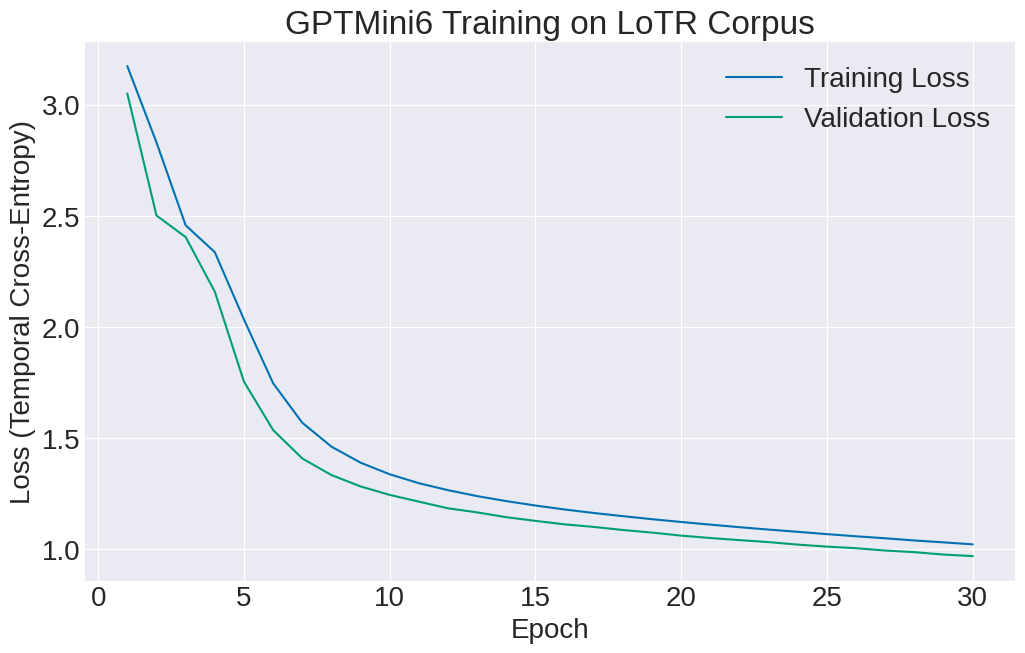


Training finished after 30 epochs.
Final validation loss: 0.9701


In [9]:
# Plot training results
plt.figure(figsize=(12, 7))
plt.plot(np.arange(1, len(train_loss_hist) + 1), train_loss_hist, label='Training Loss')
val_epochs = np.arange(1, len(val_loss_hist) + 1)
plt.plot(val_epochs, val_loss_hist, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Temporal Cross-Entropy)')
plt.title('GPTMini6 Training on LoTR Corpus')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nTraining finished after {epochs_trained} epochs.")
print(f"Final validation loss: {val_loss_hist[-1]:.4f}")

In [16]:
from addition_dataset import make_ind2char_mapping

# Create the reverse mapping
ind2char_map = make_ind2char_mapping(char2ind_map)

prompt = "In the fires of Mount Doom"

gen_text = lotr_gpt.generate_sequence(
    prompt=prompt,
    length=1024,
    char2ind_map=char2ind_map,
    ind2char_map=ind2char_map,
    method='distributed', 
    live_print=True
)

# print('***final output***')
# print(''.join(gen_text))

In the fires of Mount Doom, and each of what lay the sky could say of Isengard. 
And then Aragorn remained in the West in despair, though him light upon his bop 
and drew him up, he looked above and speaking again with his shoulders words, soften 
on his terrible eyes, and past the sun thudding swiftly towards his gazing with 
his staff.
When the Lord Faramir had gone, he got his time to enter Moria. So many of the Dead 
Tower and Minas Tirith. This is the first that the Rohirrim were slain and vanished.
 We are the Naithbreakers of Rohan; but what have come to the Great River, if we 
are not after all.'
'We cannot cape on all,' answered Gandalf. 'He may go his home from his will, if 
we ever have taken a lodging towards Isengard with a last silence when part out 
his way Faramir and Aragorn; and yet even that no Westfold had set a gift, on the 
City, then he went down. Though he was most of the earth in force of the Black Riders,
 but a great black roll. Swiftly there was a cedar that

In [27]:
lotr_gpt.save_weights('lotr_gpt_weights.h5')

Network weights saved to lotr_gpt_weights.h5


#### Saved Model

In [2]:
from gpts import GPT2XL

In [9]:
lotr_gpt_loaded = GPT2XL(
    vocab_sz=len(char2ind_map),
    seq_len=seq_len,
    padding_token_enc=padding_char_enc,
    num_heads=6,        # Scaled down from 25
    embed_dim=384,      # Scaled down from 1600
    n_layers=6,         # Scaled down from 48
    dropout_rate=0.2
)

# Compile the model
lotr_gpt_loaded.compile(loss='temporal_cross_entropy')

---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 256, 95]
TransformerBlock_5:
	TransformerBlock_5_mlp:
	Dropout layer output(TransformerBlock_5_mlp_dropout) shape: [1, 256, 384]
	Dense layer output(TransformerBlock_5_mlp_dense2) shape: [1, 256, 384]
	Dense layer output(TransformerBlock_5_mlp_dense1) shape: [1, 256, 1536]
	TransformerBlock_5_mha:
	Dropout layer output(TransformerBlock_5_mha_dropout) shape: [1, 256, 384]
	Dense layer output(TransformerBlock_5_mha_dense_proj) shape: [1, 256, 384]
	TransformerBlock_5_mha_attn:
	Dropout layer output(TransformerBlock_5_mha_attn_dropout) shape: [1, 6, 256, 256]
	TransformerBlock_5_mha_qkv:
	Dense layer output(TransformerBlock_5_mha_qkv_V) shape: [1, 256, 384]
	Dense layer output(TransformerBlock_5_mha_qkv_K) shape: [1, 256, 384]
	Dense layer output(TransformerBlock_5_mha_qkv_Q) shape: [1, 256, 384]
TransformerBlock_4:
	TransformerBlock_4_mlp:
	Dropout layer output(TransformerBlo

In [11]:
# Load the weights
lotr_gpt_loaded.load_weights('lotr_gpt_weights.h5.npy')

from addition_dataset import make_ind2char_mapping

# Create the reverse mapping
ind2char_map = make_ind2char_mapping(char2ind_map)

# Generate text with the loaded model
prompt = "Gandalf"
gen_text_loaded = lotr_gpt_loaded.generate_sequence(
    prompt=prompt,
    length=1024,
    char2ind_map=char2ind_map,
    ind2char_map=ind2char_map,
    method='distributed', 
    live_print=True
)

Network weights loaded from lotr_gpt_weights.h5.npy
Gandalf said: I'm afraid he'll come down to reach it. He is with you with you, Sam:
 I shouldn't know. he's your pipe thought and we'd clasp on towards Mordor, Sam?
'
Just occurry he found Sam in front of his bony webs, and with his victory I was 
made it and hastily, and it's best a chance it was killing a way. He was just with 
a great foot into the deadly places of the path and the road that men were not late.
 They looked eastwards, but among the very walls there were troubled for a while.
 But now no sign of milk. The Company was not scattered the path to became more 
ready and more all. The riddles of this reckless course, have not in the distant 
fissuit, a warning flat roll of mainly and where this clear voice strong and not 
glimpse of our counsels. Then the father and day even forward from Dragon.
As soon as I him said to Elrond and Faramir who sat Gandalf down. Then there was 
too soon. But this spot would be forced off Ort

#### 2. BPE Tokenization using the GPT2 Tokenizer from Hugging Face

In [19]:
!pip install transformers

In [3]:
from preprocess_corpus import load_and_tokenize
from gpts import *

# Set random seeds for reproducibility
tf.random.set_seed(0)
np.random.seed(0)

# Load and preprocess Shakespeare with BPE tokenization
print("Loading and preprocessing Shakespeare with BPE tokenization...")
x_seqs, y_labels, tokenizer, vocab_size = load_and_tokenize(
    path='data/shakespeare.txt',
    seq_len=250
)

# Split into training and validation sets
val_size = 200
x_val = x_seqs[:val_size]
y_val = y_labels[:val_size]
x_train = x_seqs[val_size:]
y_train = y_labels[val_size:]

print(f"Training set size: {len(x_train)}")
print(f"Validation set size: {len(x_val)}")

# Create a scaled-down version of GPT-2 XL for feasibility
print("Initializing GPT-2 XL model (scaled down for training)...")
gpt2xl_shakespeare = GPT2XL(
    vocab_sz=vocab_size,
    seq_len=250,
    padding_token_enc=tokenizer.pad_token_id,
    num_heads=12,        # Scaled down from 25
    embed_dim=384,      # Scaled down from 1600
    n_layers=12,         # Scaled down from 48
    dropout_rate=0.2
)

# Compile the model
gpt2xl_shakespeare.compile(loss='temporal_cross_entropy')

# Training parameters
batch_size = 32  # Smaller batch size due to model size
patience = 15
lr_patience = 9
lr_max_decays = 3
max_epochs = 50  # Fewer epochs for this large model

# Train the model
print("Starting training GPT-2 XL on Shakespeare corpus...")
tf.keras.backend.clear_session()

train_loss_hist, val_loss_hist, val_acc_hist, epochs_trained = gpt2xl_shakespeare.fit(
    x=x_train,
    y=y_train,
    x_val=x_val,
    y_val=y_val,
    batch_size=batch_size,
    max_epochs=max_epochs,
    val_every=1,
    verbose=True,
    patience=patience,
    lr_patience=lr_patience,
    lr_decay_factor=0.5,
    lr_max_decays=lr_max_decays
)


Loading and preprocessing Shakespeare with BPE tokenization...


Token indices sequence length is longer than the specified maximum sequence length for this model (338025 > 1024). Running this sequence through the model will result in indexing errors


Training set size: 1152
Validation set size: 200
Initializing GPT-2 XL model (scaled down for training)...
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 250, 50257]
TransformerBlock_11:
	TransformerBlock_11_mlp:
	Dropout layer output(TransformerBlock_11_mlp_dropout) shape: [1, 250, 384]
	Dense layer output(TransformerBlock_11_mlp_dense2) shape: [1, 250, 384]
	Dense layer output(TransformerBlock_11_mlp_dense1) shape: [1, 250, 1536]
	TransformerBlock_11_mha:
	Dropout layer output(TransformerBlock_11_mha_dropout) shape: [1, 250, 384]
	Dense layer output(TransformerBlock_11_mha_dense_proj) shape: [1, 250, 384]
	TransformerBlock_11_mha_attn:
	Dropout layer output(TransformerBlock_11_mha_attn_dropout) shape: [1, 12, 250, 250]
	TransformerBlock_11_mha_qkv:
	Dense layer output(TransformerBlock_11_mha_qkv_V) shape: [1, 250, 384]
	Dense layer output(TransformerBlock_11_mha_qkv_K) shape: [1, 250, 384]
	Dense layer output(Transfor

W0000 00:00:1747621373.379718   12763 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1747621373.466746   12763 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Tensor("Reshape_74:0", shape=(64, 250), dtype=float32)
Epoch 1/50 - Train Loss: 7.1816, Val Loss: 6.7196, Val Acc: 0.1258
Epoch 1 completed in 31.09 seconds.
Epoch 2/50 - Train Loss: 6.3848, Val Loss: 6.6602, Val Acc: 0.1258
Epoch 2 completed in 4.49 seconds.
Epoch 3/50 - Train Loss: 6.3723, Val Loss: 6.6726, Val Acc: 0.1258
Epoch 3 completed in 4.45 seconds.
Epoch 4/50 - Train Loss: 6.3682, Val Loss: 6.6765, Val Acc: 0.1258
Epoch 4 completed in 4.45 seconds.
Epoch 5/50 - Train Loss: 6.3657, Val Loss: 6.6805, Val Acc: 0.1258
Epoch 5 completed in 4.45 seconds.


KeyboardInterrupt: 

In [ ]:
# Plot training results
plt.figure(figsize=(12, 7))
plt.plot(np.arange(1, len(train_loss_hist) + 1), train_loss_hist, label='Training Loss')
val_epochs = np.arange(1, len(val_loss_hist) + 1)
plt.plot(val_epochs, val_loss_hist, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Temporal Cross-Entropy)')
plt.title('GPT-2 XL Training on Shakespeare Corpus with BPE Tokenization')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nTraining finished after {epochs_trained} epochs.")
print(f"Final validation loss: {val_loss_hist[-1]:.4f}")

In [4]:
# Modify the generate_sequence method to work with BPE tokens
def generate_bpe_text(model, tokenizer, prompt, max_length=500, method='distributed'):
    """Generate text using the GPT-2 XL model with BPE tokenization"""
    # Tokenize the prompt
    prompt_tokens = tokenizer.encode(prompt)
    
    # Create mappings for the model
    token2ind_map = {i: i for i in range(tokenizer.vocab_size)}
    ind2token_map = {i: i for i in range(tokenizer.vocab_size)}
    
    # Generate token IDs
    generated_tokens = model.generate_sequence(
        prompt=prompt_tokens,
        length=max_length,
        char2ind_map=token2ind_map,
        ind2char_map=ind2token_map,
        method=method,
        live_print=False
    )
    
    # Convert generated tokens to text
    full_tokens = prompt_tokens + generated_tokens
    generated_text = tokenizer.decode(full_tokens)
    
    return generated_text

# Generate text with different prompts
prompts = [
    "To be, or not to be:",
    "All the world's a stage,",
    "Friends, Romans, countrymen,"
]

for prompt in prompts:
    print(f"\n\n{'='*50}\nPrompt: {prompt}\n{'='*50}")
    
    # Generate with distributed sampling (more creative)
    text_distributed = generate_bpe_text(
        gpt2xl_shakespeare, 
        tokenizer, 
        prompt, 
        max_length=500, 
        method='distributed'
    )
    print(f"\n--- Generated text (distributed) ---\n{text_distributed}")



Prompt: To be, or not to be:


KeyboardInterrupt: 